# Importing All Modules Used

In [71]:
import numpy as np
import pandas as pd
import os # operating system.
import matplotlib.pyplot as plt
import tensorflow as tf
import typing_extensions
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import keras
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Specifying Location Of Training And Testing Data

In [72]:
training_path = 'C:\\Users\\mwalu\\Downloads\\Apziva Projects\\Project 4\\images\\images\\training'
testing_path = 'C:\\Users\\mwalu\\Downloads\\Apziva Projects\\Project 4\\images\\images\\testing'
image_size = (120,120)

In [73]:
cwd = os.getcwd() # This is what you type if you want the directory to specify a path to get your file.
cwd # current working directory.

'C:\\Users\\mwalu\\Downloads\\Apziva Projects\\Project 4'

# Reading In The Data And Displaying Flip And Non-Flip Images

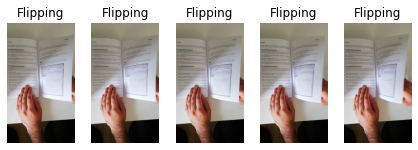

In [74]:
flipped_images = []
not_flipped_images = []
for subdir in os.listdir(training_path):
    subdir_path = os.path.join(training_path, subdir)
    if os.path.isdir(subdir_path):
        image_list = os.listdir(subdir_path)
        for i in range(len(image_list)):
            if i < 5 and subdir == 'flip':
                flipped_images.append(os.path.join(subdir, image_list[i]))
            elif i < 5 and subdir == 'notflip':
                not_flipped_images.append(os.path.join(subdir, image_list[i]))
# Displaying the flipping images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    img_path = os.path.join(training_path, flipped_images[i])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('Flipping')
    plt.axis('off')
plt.tight_layout()
plt.show()

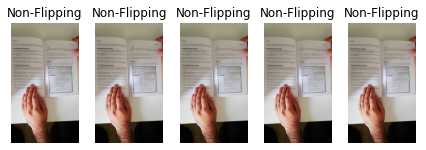

In [75]:
# Displaying the not-flipping images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    img_path = os.path.join(training_path, not_flipped_images[i])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('Non-Flipping')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Specifying The Training, Validation And Testing Datasets To Be Used In Neural Network

In [76]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    validation_split=0.2,
    subset="training",
    label_mode='int',
    batch_size=32,
    image_size=image_size,
    class_names=['notflip', 'flip'],
    seed=42
)

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [77]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    validation_split=0.2,
    subset="validation",
    label_mode='int',
    batch_size=32,
    image_size=image_size,
    class_names=['notflip', 'flip'],
    seed=42
)

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [78]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_path,
    validation_split = 0.2,
    subset="validation",
    label_mode='int',
    batch_size=32,
    image_size=image_size,
    class_names=['notflip', 'flip'],
    seed=42
)

Found 597 files belonging to 2 classes.
Using 119 files for validation.


# First CNN - Simple Model With 3 Layers

In [79]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 118, 118, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 57, 57, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,825,930 (10.78 MB)

 Trainable params: 2,825,930 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # need to put f1 score

# Fitting The First CNN To Training Dataset

In [84]:
model.fit(train_dataset) # This model fit the training dataset once.

60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.4898 - loss: 35.2029


# Sample Prediction Using Test Dataset

In [85]:
model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


array([[ 13.854655  ,  13.761728  ,  -0.6695534 , ..., -12.393206  ,
         -1.1752476 ,  -1.7800559 ],
       [ 19.219715  ,  20.459509  ,  -0.6437137 , ..., -18.09878   ,
         -0.7330903 ,  -3.8698022 ],
       [ 13.715657  ,  13.315072  ,  -0.3281661 , ..., -11.793021  ,
         -1.499691  ,  -1.5222747 ],
       ...,
       [ 13.55163   ,  12.857373  ,  -0.02845909, ..., -11.278757  ,
         -1.3122756 ,  -1.207937  ],
       [ 17.572325  ,  18.36985   ,  -0.47611335, ..., -16.307043  ,
         -1.3722578 ,  -3.2953706 ],
       [ 17.695543  ,  18.041834  ,  -0.71656615, ..., -16.048004  ,
         -0.8856582 ,  -2.4572783 ]], dtype=float32)

# Building Another More Complex 3 Layered Convolutional Neural Network

In [86]:
model=Sequential() # alternative model from binary classification website
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (120, 120, 3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu')) # change to 128 not 64
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Error message comes up when I chose f1_score instead of accuracy, but works with accuracy.
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy']) # change to f1 score but gives error.

# Fitting The New Model To The Training Dataset With 20 Epochs

In [87]:
hist = model.fit(train_dataset, steps_per_epoch=8, epochs = 20, validation_data = validation_dataset, validation_steps=2) # this is a problem.  What do I use for validation data.

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 905ms/step - accuracy: 0.5027 - loss: 350.4353 - val_accuracy: 0.5469 - val_loss: 0.7543
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.5161 - loss: 4.6388 - val_accuracy: 0.6719 - val_loss: 0.6458
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.6179 - loss: 0.6957 - val_accuracy: 0.6250 - val_loss: 0.6823
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 627ms/step - accuracy: 0.6529 - loss: 0.6420 - val_accuracy: 0.5625 - val_loss: 0.6880
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.6453 - loss: 0.6478 - val_accuracy: 0.5312 - val_loss: 0.6821
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.5802 - loss: 0.6556 - val_accuracy: 0.6250 - val_loss: 0.6827
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step - accuracy: 0.5812 - loss: 0.6531 - val_accuracy: 0.5781 - val_loss: 0.6716
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.6273 - loss: 0.5556 - val_accuracy: 0.6333 - val_los

# Test Metric For Test Dataset

In [88]:
model.evaluate(test_dataset) # model evaluates test 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.6432 - loss: 0.6708


[0.6668603420257568, 0.6470588445663452]

# Refitting The New Model Specifying Callbacks By Monitoring Validation Loss And Refit Model With Each Epoch Carrying Over The Best Weights

In [89]:
#using necessary callbacks by monitoring val_loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('weight.hdf5.keras', monitor='val_loss', save_best_only=True)
# Train the model
training = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]) # refitting the model with save_best_only to increase accuracy.  Call back works better.

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 682ms/step - accuracy: 0.6187 - loss: 0.6425 - val_accuracy: 0.6674 - val_loss: 0.6009
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 673ms/step - accuracy: 0.6752 - loss: 0.6023 - val_accuracy: 0.6527 - val_loss: 0.5963
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 667ms/step - accuracy: 0.7168 - loss: 0.5453 - val_accuracy: 0.7113 - val_loss: 0.5214
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 652ms/step - accuracy: 0.7636 - loss: 0.4757 - val_accuracy: 0.8661 - val_loss: 0.3631
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 654ms/step - accuracy: 0.8387 - loss: 0.3623 - val_accuracy: 0.8975 - val_loss: 0.2941
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 658ms/step - accuracy: 0.8644 - loss: 0.3001 - val_accuracy: 0.9226 - val_loss: 0.2298
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 679ms/step - accuracy: 0.8996 - loss: 0.2467 - val_accuracy: 0.9310 - val_loss: 0.1825
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - accuracy: 0.9041 - loss: 0.2299 - val_accu

# Improved Accuracy With Specifying Callbacks.  Final Evaluation Of New Model With Confusion Matrix And F1 Score

In [90]:
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels
for images, labels in test_dataset:
    predictions = model(images).numpy() > 0.5
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

In [91]:
confusion_matrix(y_true, y_pred)

array([[61,  0],
       [ 2, 56]], dtype=int64)

In [92]:
sklearn.metrics.f1_score(y_pred, y_true)

0.9824561403508771

In [93]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_pred, y_true))

[[61  0]
 [ 2 56]]
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        63
        True       0.97      1.00      0.98        56

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119

